In [7]:
import pandas as pd

customer = pd.read_csv("AWCustomers.csv")
sales = pd.read_csv("AWSales.csv")

print(customer.head())
print(sales.head())


   CustomerID Title FirstName MiddleName  LastName Suffix  \
0       21173   NaN      Chad          C      Yuan    NaN   
1       13249   NaN      Ryan        NaN     Perry    NaN   
2       29350   NaN     Julia        NaN  Thompson    NaN   
3       13503   NaN  Theodore        NaN     Gomez    NaN   
4       22803   NaN  Marshall          J      Shan    NaN   

             AddressLine1 AddressLine2         City    StateProvinceName  ...  \
0      7090 C. Mount Hood          NaN   Wollongong      New South Wales  ...   
1     3651 Willow Lake Rd          NaN      Shawnee     British Columbia  ...   
2  1774 Tice Valley Blvd.          NaN  West Covina           California  ...   
3         2103 Baldwin Dr          NaN    Liverpool              England  ...   
4         Am Gallberg 234          NaN        Werne  Nordrhein-Westfalen  ...   

         Education      Occupation Gender MaritalStatus HomeOwnerFlag  \
0        Bachelors        Clerical      M             M             1   


In [10]:
# Q1(b) Create a new Data Frame with the selected attributes only
import pandas as pd

# Load files
customer = pd.read_csv("AWCustomers.csv")
sales = pd.read_csv("AWSales.csv")

# Merge customer and sales data
data = pd.merge(customer, sales, on="CustomerID")

# Select relevant features
selected_cols = [
    'CustomerID', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
    'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
    'YearlyIncome', 'BikeBuyer'
]

selected_data = data[selected_cols]

print(selected_data.head())



   CustomerID        Education      Occupation Gender MaritalStatus  \
0       21173        Bachelors        Clerical      M             M   
1       13249  Partial College        Clerical      M             M   
2       29350        Bachelors        Clerical      F             S   
3       13503  Partial College  Skilled Manual      M             M   
4       22803  Partial College  Skilled Manual      M             S   

   HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  YearlyIncome  \
0              1                3                     0         81916   
1              1                2                     1         81076   
2              0                3                     0         86387   
3              1                2                     1         61481   
4              1                1                     0         51804   

   BikeBuyer  
0          1  
1          1  
2          1  
3          1  
4          1  


In [11]:
# Q2 Is there a significant difference in the average income of customers who purchased a bike
# vs. those who did not? 
from scipy.stats import ttest_ind

buyers = selected_data[selected_data['BikeBuyer'] == 1]['YearlyIncome']
non_buyers = selected_data[selected_data['BikeBuyer'] == 0]['YearlyIncome']

t_stat, p_val = ttest_ind(buyers, non_buyers)
print("T-Statistic:", t_stat)
print("P-Value:", p_val)

if p_val < 0.05:
    print("There is a significant difference in average income between buyers and non-buyers.")
else:
    print("No significant difference found.")


T-Statistic: 34.90371793193402
P-Value: 1.722540752009775e-258
There is a significant difference in average income between buyers and non-buyers.


In [12]:
# Q3 What percentage of customers in each commute distance category purchased a bike? 
if 'CommuteDistance' in selected_data.columns:
    commute_bike = selected_data.groupby('CommuteDistance')['BikeBuyer'].mean() * 100
    print(commute_bike)
else:
    print("CommuteDistance column not found in dataset.")


CommuteDistance column not found in dataset.


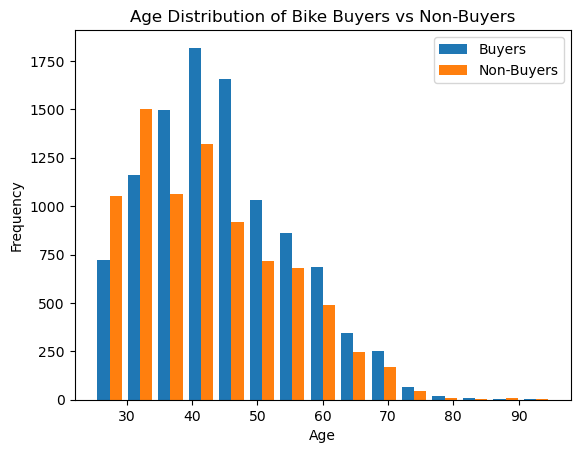

In [13]:
# Q4 Does age distribution differ between bike buyers and non-buyers?
import matplotlib.pyplot as plt

customer['BirthDate'] = pd.to_datetime(customer['BirthDate'])
customer['Age'] = 2025 - customer['BirthDate'].dt.year

data_age = pd.merge(customer[['CustomerID', 'Age']], sales[['CustomerID', 'BikeBuyer']], on='CustomerID')

buyers_age = data_age[data_age['BikeBuyer'] == 1]['Age']
non_buyers_age = data_age[data_age['BikeBuyer'] == 0]['Age']

plt.hist([buyers_age, non_buyers_age], label=['Buyers', 'Non-Buyers'], bins=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Bike Buyers vs Non-Buyers')
plt.legend()
plt.show()


In [14]:
# Q5 Is the proportion of bike buyers different across marital status categories?
import scipy.stats as stats

contingency = pd.crosstab(selected_data['MaritalStatus'], selected_data['BikeBuyer'])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square:", chi2)
print("P-Value:", p_val)

if p_val < 0.05:
    print("Bike buying proportion differs across marital status categories.")
else:
    print("No significant relationship between marital status and bike buying.")


Chi-square: 657.6873291414975
P-Value: 4.75645670240197e-145
Bike buying proportion differs across marital status categories.
